In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
import gc
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder , MinMaxScaler


     |████████████████████████████████| 994 kB 8.1 MB/s 
     |████████████████████████████████| 6.3 MB 34.2 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 


<h2>import data</h2>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWjuMifUJTaGijnZjy3vhcDJAlrf-1gHodDQoz6-zg4hmVToY3VY7HM


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
sng_ex = pd.read_csv("/content/drive/My Drive/song_extra_info.csv")
sng_ex.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
df_train = pd.read_csv("/content/drive/My Drive/train.csv")

Memory usage of dataframe is 337.71 MB
Memory usage after optimization is: 84.59 MB
Decreased by 75.0%


In [ ]:
df_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [ ]:
df_songs = pd.read_csv("/content/drive/My Drive/songs.csv")


In [ ]:
df_songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
df_members = pd.read_csv("/content/drive/My Drive/members.csv",parse_dates=['registration_init_time','expiration_date'])
df_members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [ ]:
df_members['membership_days'] = df_members['expiration_date'].subtract(df_members['registration_init_time']).dt.days.astype(int)
df_members['registration_year'] = df_members['registration_init_time'].dt.year
df_members['expiration_year'] = df_members['expiration_date'].dt.year
df_members.drop(columns = ['registration_init_time' , 'expiration_date'] , inplace = True)



<h2>

## Analyze Data

</h2> 




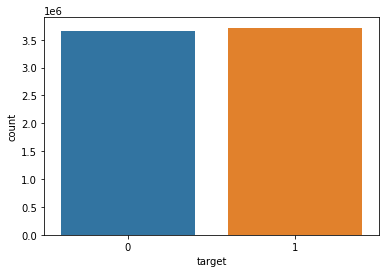

In [ ]:
sns.countplot(x='target',data=df_train)

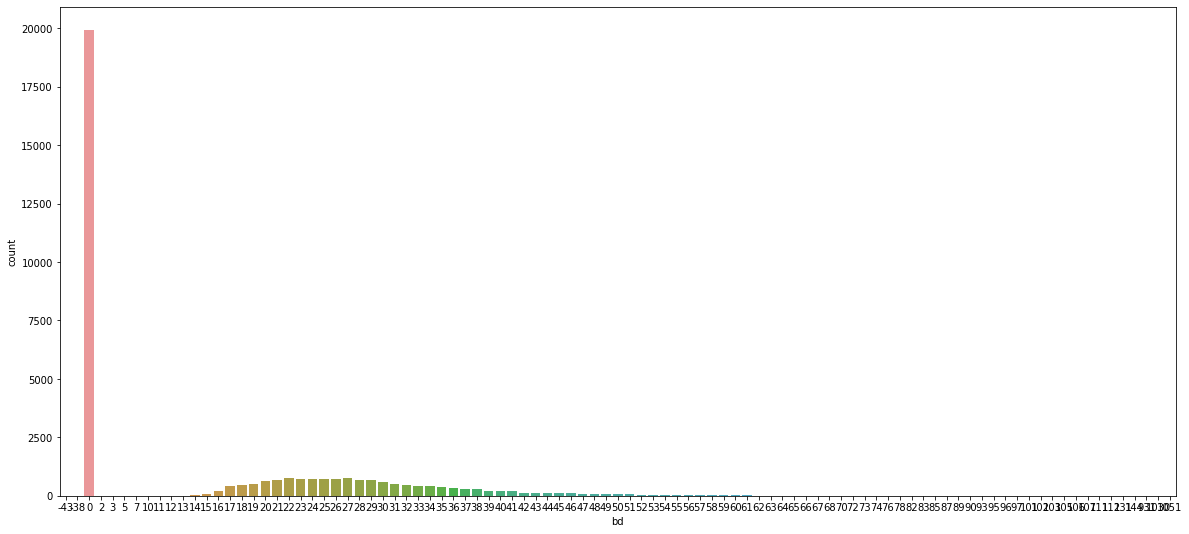

In [ ]:
plt.figure(figsize=(20,9))
sns.countplot(x='bd',data=df_members)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


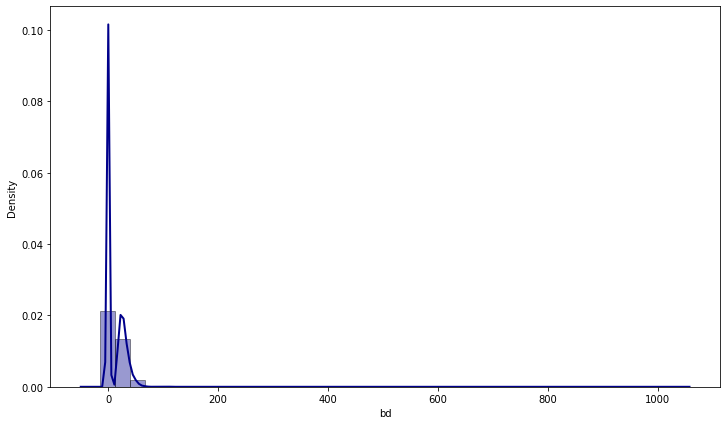

In [ ]:
plt.figure(figsize=(12,7))
sns.distplot(df_members['bd'], hist=True, kde=True, 
             bins=40, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

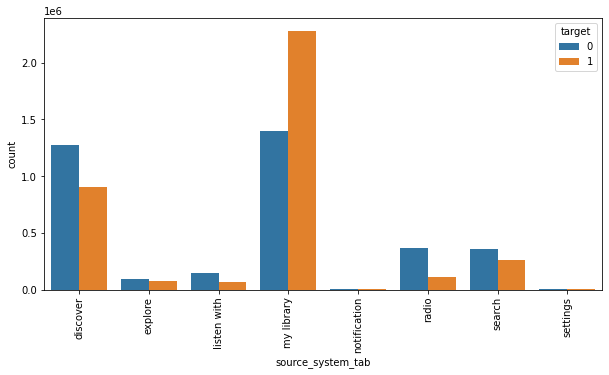

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df_train['source_system_tab'],hue=df_train['target'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

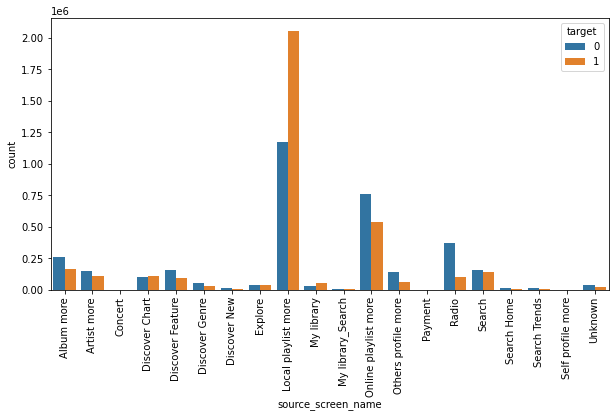

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df_train['source_screen_name'],hue=df_train['target'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

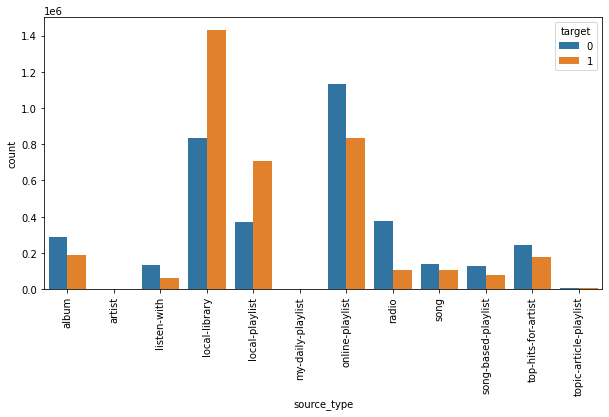

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df_train['source_type'],hue=df_train['target'])
plt.xticks(rotation=90)

In [ ]:
train_members=df_train.merge(df_members,on='msno')
train_members.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,membership_days,registration_year,expiration_year
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,2103,2012,2017
1,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,NaN,7,2103,2012,2017
2,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1,1,0,NaN,7,2103,2012,2017
3,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1,1,0,NaN,7,2103,2012,2017
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,XUz4Z4wPPChz+OIwkwj7HJ8teIjW3rEMdEATM80rDxM=,explore,Explore,online-playlist,1,1,0,NaN,7,2103,2012,2017


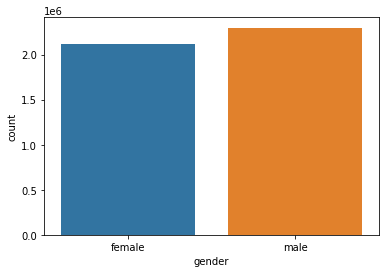

In [ ]:
sns.countplot(x='gender',data=train_members)

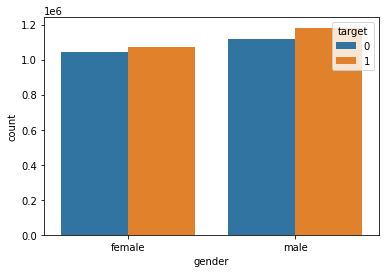

In [ ]:
sns.countplot(x='gender',hue='target',data=train_members)

In [ ]:
train_songs=df_train.merge(df_songs,on='song_id')

In [ ]:
train_songs.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,e5Ezre9HPuPos+CXQXtmo32E/hHIZTMmo6jG3yRf6UA=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-playlist,1,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
2,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
3,sSexP400TJOZRhx3JB+0s9cqrCnqrlV51B9njoKR1II=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
4,hKdGiUKHVqKkXGHLrc+EzdSW6q0ERAJ2Cs7/L1N0Ae4=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,NaN,online-playlist,0,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0



<h2>



# Extract Infos From isrc



</h2>


In [ ]:
def get_year(isrc):
    if pd.isnull(isrc):
        return np.nan
    else:
        if int(str(isrc)[5:7]) > 17:
            temp =  1900+int(str(isrc)[5:7])
        else:
            temp = 2000+int(isrc[5:7])
        return temp

<h2>


#Create a DataFrame for training

</h2>


In [ ]:
df_train = df_train.merge(df_songs,on='song_id',how='left')


In [ ]:
df_train=df_train.merge(df_members,on='msno',how='left')


In [ ]:
df_train=df_train.merge(sng_ex,on='song_id',how='left')

In [ ]:
df_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,membership_days,registration_year,expiration_year,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,1,0,NaN,7,2103,2012,2017,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,13,24,female,9,2301,2011,2017,Lords of Cardboard,US3C69910183
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,13,24,female,9,2301,2011,2017,Hip Hop Is Dead(Album Version (Edited)),USUM70618761
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,13,24,female,9,2301,2011,2017,Disco Africa,GBUQH1000063
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,1,0,NaN,7,2103,2012,2017,Sleep Without You,QM3E21606003



<h2>

# Data Preprocessing

</h2>



In [ ]:
df_train.isna().sum()

msno                        0
song_id                     0
source_system_tab       24849
source_screen_name     414804
source_type             21539
target                      0
song_length               114
genre_ids              118455
artist_name               114
composer              1675706
lyricist              3178798
language                  150
city                        0
bd                          0
gender                2961479
registered_via              0
membership_days             0
registration_year           0
expiration_year             0
name                     1457
isrc                   577858
dtype: int64

In [ ]:
def  count_col(comp):
    if comp=='no_composer' or comp=='no_lyrics' or comp=='no_artist_name':
        return 0
    else:
        return comp.count('|')+comp.count('/') + comp.count('//') + comp.count(';') + 1

In [ ]:
def fill_missing_data(data):
  """this function will fill the missing data in the data frame with the prpriete values """
  data['language'].fillna(data['language'].mode().values[0] , inplace= True)
  data['language'] = data['language'].astype(np.int8)
  print(1)
  data['artist_name'].fillna('no_artist_name',inplace=True)
  data['coun_tartist_name'] = data['artist_name'].apply(lambda x:count_col(x)).astype(np.int8)
  print(2)
  data['source_system_tab'] = data['source_system_tab'].cat.add_categories('no_src_system_tab')
  data['source_system_tab'].fillna('no_src_system_tab',inplace=True)

  data['source_screen_name'] = data['source_screen_name'].cat.add_categories('no_src_screen_name')
  data['source_screen_name'].fillna('no_src_screen_name',inplace=True)

  data['source_type'] = data['source_type'].cat.add_categories('no_source_type')
  data['source_type'].fillna('no_source_type',inplace=True)
  print(3)
  data['genre_ids'].fillna(0,inplace=True)
  data['count_genre_ids'] = data['genre_ids']
  print(4)
  data['bd'].fillna(0,inplace=True)
  data['bd'] = data['bd'].astype(np.uint32)
  print(5)
  data['composer'].fillna('no_composer',inplace=True)
  data['count_composer'] = data['composer'].apply(lambda x:count_col(x)).astype(np.int8)
  print(6)
  data['lyricist'].fillna('no_lyrics',inplace=True)
  data['count_lyricist'] = data['lyricist'].apply(lambda x:count_col(x)).astype(np.int8)
  print(7)
  data['gender'].fillna('no_gender',inplace=True)
  
  print(8)
  data['song_length'].fillna(data['song_length'].mean(),inplace=True)
  data['song_length'] = data['song_length'].astype(np.uint32)
  return data


In [ ]:
del  df_members ,df_songs 

In [ ]:
df_final=fill_missing_data(df_train)

1
2
3
3
4
5
6
7
8


In [ ]:
df_final['year']= df_final['isrc'].apply(lambda x: get_year(x))

In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/test.csv')

In [ ]:
df_test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [ ]:
df_test = df_test.merge(df_songs,on='song_id',how='left')
df_test=df_test.merge(df_members,on='msno',how='left')
df_test=df_test.merge(sng_ex,on='song_id',how='left')

In [ ]:
df_test=fill_missing_data(df_test)

1
2
3
4
5
6
7
8


In [ ]:
played_song_count_train = {k: v for k, v in df_final['song_id'].value_counts().iteritems()}
played_song_count_test = {k: v for k, v in df_test['song_id'].value_counts().iteritems()}
def return_number_played(x):
    try:
        return played_song_count_train[x]
    except KeyError:
        try:
            return played_song_count_test[x]
        except KeyError:
            return 0
df_final['number_of_time_played'] = df_final['song_id'].apply(lambda x: return_number_played(x))
df_test['number_of_time_played'] = df_test['song_id'].apply(lambda x: return_number_played(x))

In [ ]:


dict_user_activity = {k:v for k,v in pd.concat([df_final['msno'] , df_test['msno']] , axis = 0).value_counts().iteritems()}
def return_user_activity(x):
    try:
        return dict_user_activity[x]
    except KeyError:
        return 0
df_final['user_activity_msno'] = df_final['msno'].apply(lambda x: return_user_activity(x))
df_test['user_activity_msno'] = df_test['msno'].apply(lambda x: return_user_activity(x))



In [ ]:
train_col = list(df_final.columns)
test_col = list(df_final.columns)
for f in test_col :
    if f not in train_col:
        print('ERROR !!!  Column from Test not found in train is ->' , f)
label_encoding = ['source_system_tab', 'source_screen_name',
       'source_type','gender']
drop = ['msno', 'song_id' , 'isrc','artist_name',
       'composer', 'lyricist','name','genre_ids']
min_max_scal = ['number_of_time_played', 'user_activity_msno','membership_days', 'song_length']

In [ ]:


for col in df_final.columns:
    if df_final[col].dtype == object:
        df_final[col] = df_final[col].astype('category')
        df_test[col] = df_test[col].astype('category')



In [ ]:
for f in label_encoding:
  lb = LabelEncoder()
  lb.fit(list(df_final[f].values)+list(df_test[f].values))
  df_final[f]=lb.transform(list(df_final[f].values))
  df_test[f]=lb.transform(list(df_test[f].values))
for f in min_max_scal:
  ms =MinMaxScaler()
  df_final[f] = ms.fit_transform(df_final[[f]])
  df_test[f] = ms.fit_transform(df_test[[f]])




In [ ]:
X_train = df_final.drop(columns = ['target'] , axis = 1)
Y_train = df_final['target'].values
X_test = df_test.drop(columns = ['id'] , axis = 1)
ids = df_test['id'].values
del df_final ,df_test
gc.collect()
train_set = lgb.Dataset(X_train , Y_train)

In [ ]:


import warnings
warnings.filterwarnings('ignore')
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'gbdt',
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': 108,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': 10,
        'num_rounds': 200,
        'metric' : 'auc'
    }

%time model_f1 = lgb.train(params, train_set=train_set,  valid_sets=train_set, verbose_eval=5)

[5]	training's auc: 0.737126
[10]	training's auc: 0.749421
[15]	training's auc: 0.756008
[20]	training's auc: 0.75993
[25]	training's auc: 0.763386
[30]	training's auc: 0.766059
[35]	training's auc: 0.769619
[40]	training's auc: 0.773521
[45]	training's auc: 0.775518
[50]	training's auc: 0.777624
[55]	training's auc: 0.779521
[60]	training's auc: 0.780983
[65]	training's auc: 0.782366
[70]	training's auc: 0.784115
[75]	training's auc: 0.78545
[80]	training's auc: 0.786672
[85]	training's auc: 0.787978
[90]	training's auc: 0.789678
[95]	training's auc: 0.790686
[100]	training's auc: 0.791699
[105]	training's auc: 0.792758
[110]	training's auc: 0.794077
[115]	training's auc: 0.79481
[120]	training's auc: 0.796964
[125]	training's auc: 0.798088
[130]	training's auc: 0.798931
[135]	training's auc: 0.799683
[140]	training's auc: 0.800354
[145]	training's auc: 0.801112
[150]	training's auc: 0.802066
[155]	training's auc: 0.80269
[160]	training's auc: 0.803204
[165]	training's auc: 0.80374
[1